This example creates a striatal network of 100 dSPN and 100 iSPN neurons. You can also do this using the command line interface, see "snudda -h".

This notebook is started in the Snudda/snudda/examples/notebooks directory, as all paths are given relative to there.

First we create a network-config.json file in networks/simple_example which is a subdirectory to the notebooks directory. The 200 neurons are placed inside a cube, with cell density 80500 neurons/mm3. The neuron morphologies and parameters are taken from the data/cellspecs/dspn and ispn folders.

In [1]:
import os
from snudda.init import SnuddaInit

network_path = os.path.join("networks","simple_example")
config_file = os.path.join(network_path, "network-config.json")
cnc = SnuddaInit(struct_def={}, config_file=config_file, num_population_units=1)
cnc.define_striatum(num_dSPN=100, num_iSPN=100, num_FS=0, num_LTS=0, num_ChIN=0,
                    volume_type="cube", cell_spec_dir="../../data/cellspecs")
cnc.write_json(config_file)


CreateConfig
Seeding with rand_seed=None
Random seed init to 573094696
Random seed place to 3235297356
Random seed detect to 1141865602
Random seed prune to 292130664
Random seed input to 2183447508
Random seed simulate to 3164948399
Overriding the number of population units
Using 1 Population Units
No structDef defined, not writing JSON file in init
Using cube for striatum
Creating cube mesh
File: networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00013543930142996346
Description: Striatum cube mesh, centre: [0.00354  0.004645 0.005081], side: 0.00013543930142996346
Adding neurons: dSPN from dir ../../data/cellspecs/dspn
Adding neurons: iSPN from dir ../../data/cellspecs/ispn
Writing networks/simple_example/network-config.json


This reads in the network-config.json file and places the dSPN and iSPN neurons within the cube volume, then writes the positions to the network-neuron-positions.hdf5 file.

In [2]:
from snudda.place import SnuddaPlace
position_file = os.path.join(network_path, "network-neuron-positions.hdf5")
sp = SnuddaPlace(config_file=config_file)
sp.read_config()
sp.write_data(position_file)

Using hdf5 version: latest
Parsing configuration file networks/simple_example/network-config.json
Reading random see from config file: 3235297356
Using mesh_bin_width 0.00013543930142996346
Cube mesh, switching to serial processing.
Found old cache file (networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/simple_example/mesh/Striatum-cube-mesh-0.00013543930142996346.obj-135-cache.pickle
Calculation time: 0.019666279666125774 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 25 dSPN_0
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Placed 25 in 0.06398293748497963 s

In [3]:
from snudda.detect import SnuddaDetect
save_file = os.path.join(network_path, "voxels", "network-putative-synapses.hdf5")

sd = SnuddaDetect(config_file=config_file, position_file=position_file, save_file=save_file)
sd.detect()

Using hdf5 driver version: latest
Memory: 54158405632 free, 67218100224 total
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Removing old files networks/simple_example/network-putative-synapses-MERGED.hdf5
Removing old files networks/simple_example/network-pruned-synapses.hdf5
Loading from networks/simple_example/network-config.json
Reading random see from config file: 1141865602
Reading prototype for: dSPN_0
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/21-6-DE-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Reading prototype for: dSPN_2
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Reading prototype for: dSPN_3
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN0

Create lookup table
detectSynapses: 0 took 0.004803163930773735 s
Create lookup table
detectGapJunctions: 0.003072780556976795 s
Wrote hyper voxel 0 (0 synapses, 0 gap junctions)
HyperID 0 completed - 0  synapses and 0 gap junctions found (in 7.475723613984883 s)
Processing hyper voxel : 38/64(21 neurons)
Create lookup table
detectSynapses: 0 took 0.0046512531116604805 s
Create lookup table
detectGapJunctions: 0.0032788123935461044 s
Wrote hyper voxel 38 (0 synapses, 0 gap junctions)
HyperID 38 completed - 0  synapses and 0 gap junctions found (in 3.649389063939452 s)
Processing hyper voxel : 2/64(20 neurons)
Create lookup table
detectSynapses: 1 took 0.005097719840705395 s
Create lookup table
detectGapJunctions: 0.003175506368279457 s
Wrote hyper voxel 2 (1 synapses, 0 gap junctions)
HyperID 2 completed - 1  synapses and 0 gap junctions found (in 2.497636861167848 s)
Processing hyper voxel : 26/64(17 neurons)
Create lookup table
detectSynapses: 0 took 0.004737584851682186 s
Create loo

Prune the synapses in the network based on the connection information in the network-config.json file.

In [4]:
from snudda.prune import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

Random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/simple_example/log/network-detect-worklog.hdf5
Reading random seed from config file: 292130664
Using default scratch path: networks/simple_example/temp
Skipping FSN to FSN connection
Skipping FSN to dSPN connection
Skipping FSN to iSPN connection
Skipping FSN to LTS connection
Skipping dSPN to ChIN connection
Skipping iSPN to ChIN connection
Skipping LTS to dSPN connection
Skipping LTS to iSPN connection
Skipping LTS to ChIN connection
Checking for merge file networks/simple_example/network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing big_merge_loopup for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Setting max_channel_type to 23 from h_id=21
Opening voxel file: networks/simple_example/voxels/network-putative-synapses-20.hdf5
[0, 521, 20971520, 0.75]
Opening 

Random seed set for neuron 73: 1374003423
Random seed set for neuron 74: 2906348857
Random seed set for neuron 75: 1070135785
Random seed set for neuron 76: 2061753041
Random seed set for neuron 77: 1242043426
Random seed set for neuron 78: 2993128981
Random seed set for neuron 79: 2513177549
Random seed set for neuron 80: 2719950141
Random seed set for neuron 81: 179348522
Random seed set for neuron 82: 1458426127
Random seed set for neuron 83: 1480096089
Random seed set for neuron 84: 327885145
Random seed set for neuron 85: 179459768
Random seed set for neuron 86: 2023584975
Random seed set for neuron 87: 2111143060
Random seed set for neuron 88: 2597621014
Random seed set for neuron 89: 692126523
Random seed set for neuron 90: 1342546375
Random seed set for neuron 91: 1621770635
Random seed set for neuron 92: 3841656713
Random seed set for neuron 93: 3187875433
Random seed set for neuron 94: 2927532108
Random seed set for neuron 95: 1506781390
Random seed set for neuron 96: 4112165

Use matplotlib to plot the network. Note that this can be quite slow for larger networks.

Loading networks/simple_example/network-pruned-synapses.hdf5
Loading config data from HDF5
200 neurons with 23640 synapses and 0 gap junctions
Load done. 0.020725728012621403
Found cache file: ../../data/cellspecs/ispn/str-ispn-e150917_c11_D2-mWT-MSN1-v20190603/WT-MSN1-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c9_d1-mWT-1215MSN03-v20190521/WT-1215MSN03-cor-rep-ax2-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c10_D1-mWT-P270-20-v20190521/WT-P270-20-15ak-cor-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e151123_c1_D2-mWT-P270-09-v20190527/WT-P270-09-15ak-cor-cache.pickle
Found cache file: ../../data/cellspecs/ispn/str-ispn-e150908_c4_D2-m51-5-DE-v20190611/51-5-DE-cor-rep-ax-cache.pickle
Found cache file: ../../data/cellspecs/dspn/str-dspn-e150917_c6_D1-m21-6-DE-v20190503/

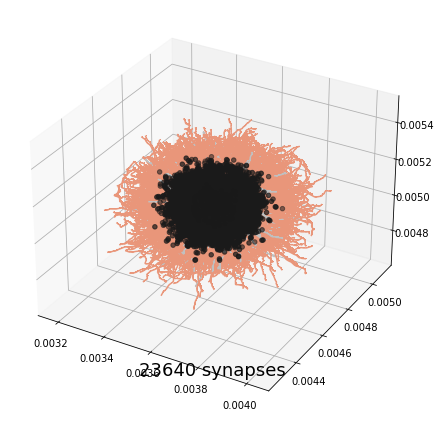

(<module 'matplotlib.pyplot' from '/home/hjorth/.local/lib/python3.7/site-packages/matplotlib/pyplot.py'>,
 <Axes3DSubplot:>)

In [5]:
from snudda.plotting.plot_network import PlotNetwork
network_file = os.path.join(network_path, "network-pruned-synapses.hdf5")
pn = PlotNetwork(network_file)
pn.plot()